In [2]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

# Check the % of No of Fraud and Non fraud in dataset
# Correlation of features - Heat map
# How money lost in Fraud Transaction
# What was the maximum, minimum and avg amount that was fraud. Use Describe
# Fraud transaction which has same features
# How many Zero euros transaction



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# df.head()

fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

fraudPercentage = len(fraud)/len(valid) * 100

print ('There are {} ({}%) fraud, out of {} transactions (Highly Imbalanced data)'.format(len(fraud), round(fraudPercentage, 2), len(df)))


There are 492 (0.17%) fraud, out of 284807 transactions (Highly Imbalanced data)


In [5]:
print ('{} Euros is the maximum amount lost in Fraud transactions'.format(fraud['Amount'].max()))
print ('{} Euros is the Total amount lost in Fraud transactions'.format(fraud['Amount'].sum()))
print ('{} Euros is the Average amount lost in Fraud transactions'.format(round(mean(fraud['Amount']), 2)))

2125.87 Euros is the maximum amount lost in Fraud transactions
60127.97 Euros is the Total amount lost in Fraud transactions
122.21 Euros is the Average amount lost in Fraud transactions


In [6]:
withZeroAmt = fraud[fraud['Amount'] == 0]

print ('{} Transactions are with Zero Euros in Fraud Case'.format(len(withZeroAmt)))


27 Transactions are with Zero Euros in Fraud Case


Data Visualizations

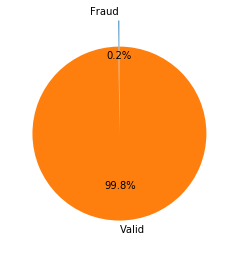

In [17]:
labels = 'Fraud', 'Valid'
data = [len(fraud), len(valid)]
explode = (0.3, 0)  # only "explode" the 2nd slice (i.e. 'Fraud')
plt.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.show()


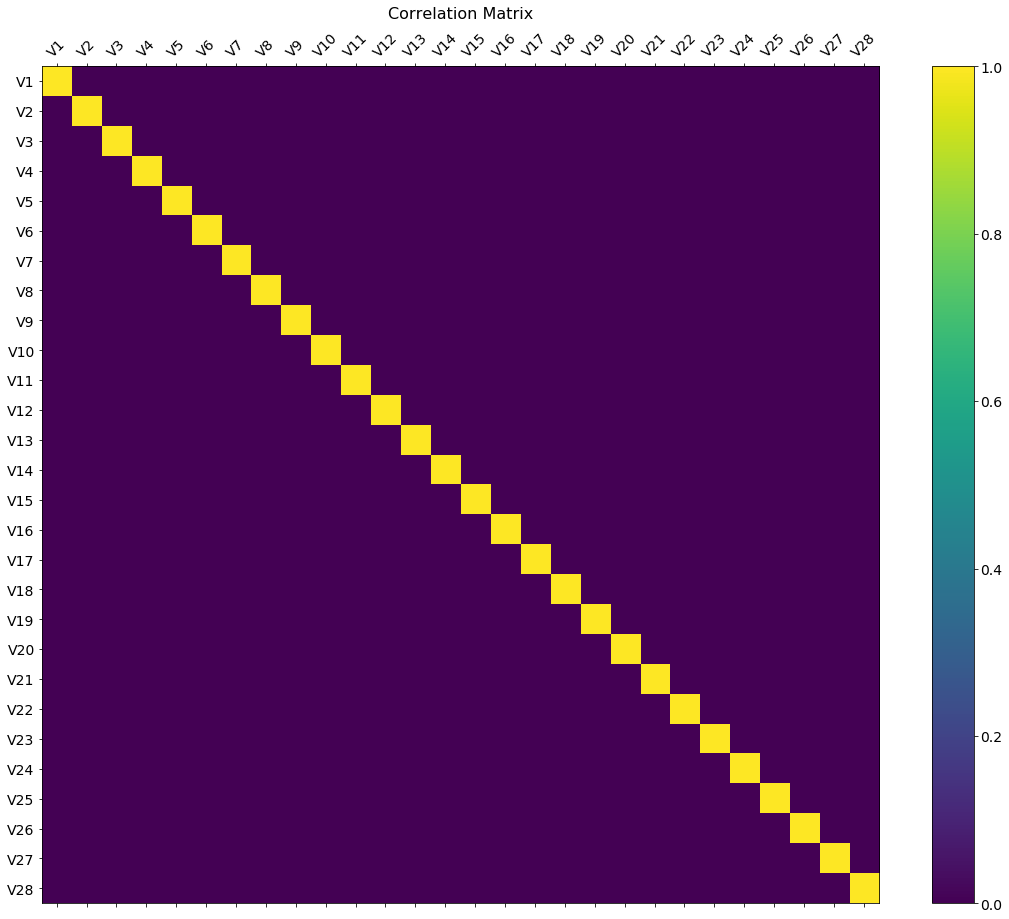

In [26]:
L = ['Time', 'Amount', 'Class']

cols = [x for x in df.columns if x not in L]
Features = df[cols]

f = plt.figure(figsize=(19, 15))
plt.matshow(Features.corr(), fignum=f.number)
plt.xticks(range(Features.shape[1]), Features.columns, fontsize=14, rotation=45)
plt.yticks(range(Features.shape[1]), Features.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);